# Lab10-K Means Clustering 

In this lab, we will perform k-means clustering on the digits dataset. 

## Importing data

Below, the data is imported:

In [91]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()


## Shuffling the data

In [92]:
targe_names = digits.target_names # the target names

indx_shuff = np.arange(digits.data.shape[0])
np.random.shuffle(indx_shuff)
y_true = digits.target[indx_shuff]
X = digits.data[indx_shuff,:]

print(targe_names.shape, X.shape, y_true.shape)
print('The target names are:\n',targe_names)

(10,) (1797, 64) (1797,)
The target names are:
 [0 1 2 3 4 5 6 7 8 9]


## Visualization of the first 20 digits from the dataset

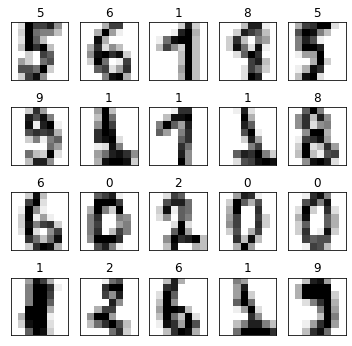

In [93]:
import numpy as np
fig, ax = plt.subplots(4, 5, figsize=(6, 6))
# centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, indx in zip(ax.flat, range(20)):
    axi.set(xticks=[], yticks=[],title=y_true[indx])
    axi.imshow(np.reshape(X[indx],(8,8)), interpolation='nearest', cmap=plt.cm.binary)

Totally we have 10 classes. Build a k-means model for classification of the digits data.

## Import Libraries



In [94]:
from sklearn.cluster import KMeans

## Apply Kmean Clustering



In [95]:
n_clusters = targe_names.size
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=10)

## Predictions and Evaluations



In [96]:
y_kmeans = kmeans.predict(X)
print(y_kmeans)
centers = kmeans.cluster_centers_
print(y_kmeans.shape, centers.shape)

[9 2 6 ... 2 0 9]
(1797,) (10, 64)


In [97]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(n_clusters):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]

print('Accuracy: ', accuracy_score(y_true, labels))

Accuracy:  0.7929883138564274


In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_true, labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.85      0.84      0.84       177
           3       0.87      0.84      0.86       183
           4       0.98      0.91      0.94       181
           5       0.90      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.97      0.91       179
           8       0.45      0.58      0.51       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.80      0.79      0.79      1797



## Visualization

Use your creativity to visualize the results (e.g. performance of the model, distribution of the data with predicted lables, etc.)

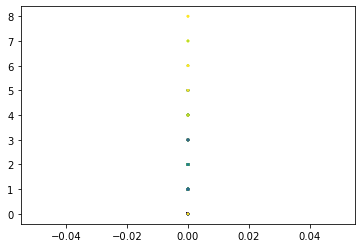

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=3, cmap='viridis')

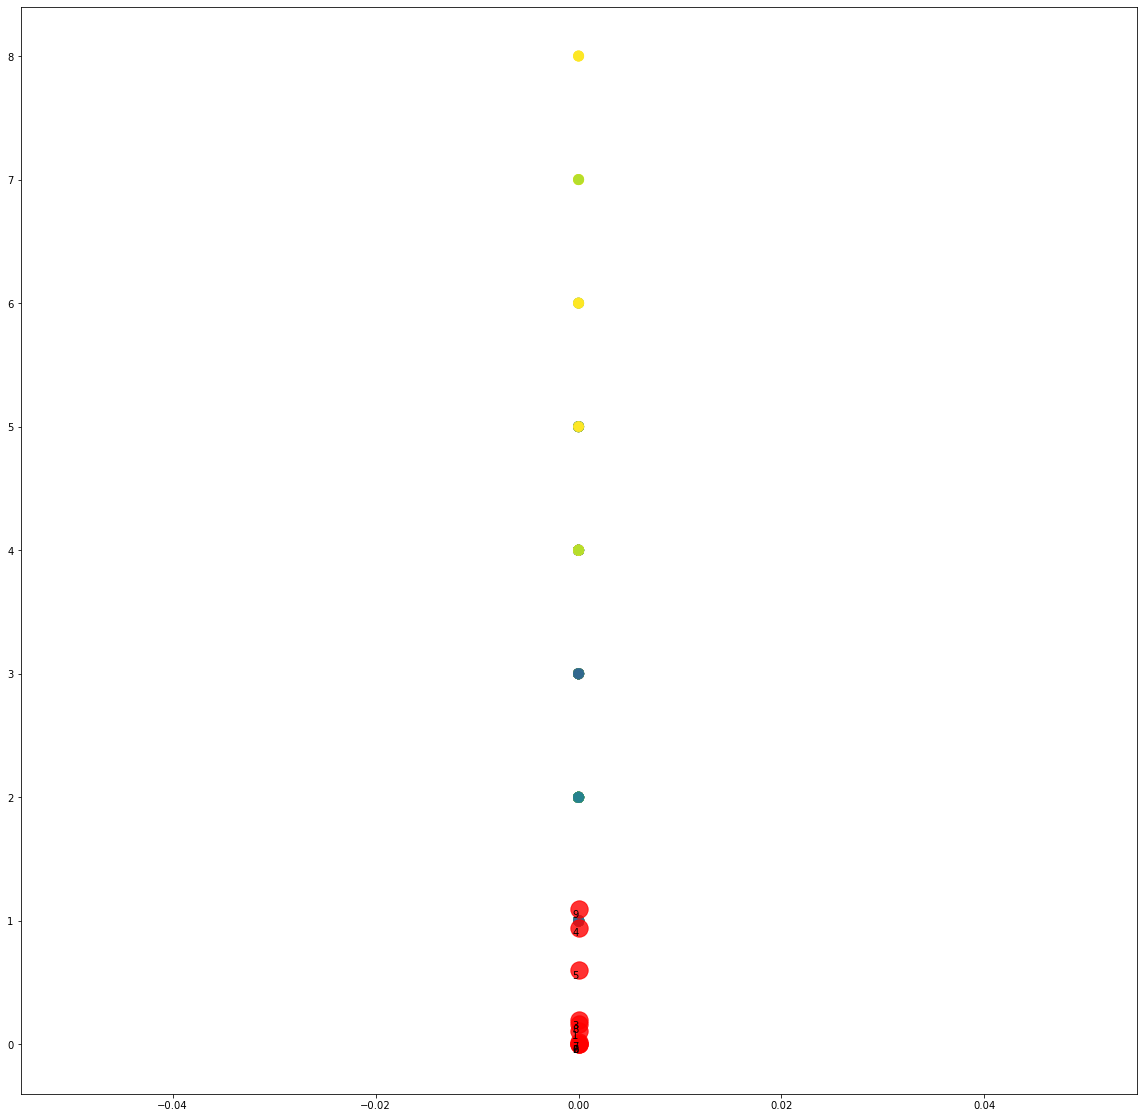

In [100]:
plt.figure(figsize=(20,20))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)
labels_plt = ['{0}'.format(i) for i in range(10)]
for i in range (n_clusters):
    xy=(centers[i, 0], centers[i, 1])
    plt.annotate(labels_plt[i],xy, horizontalalignment='right', verticalalignment='top')

Text(91.68, 0.5, 'Predicted Label')

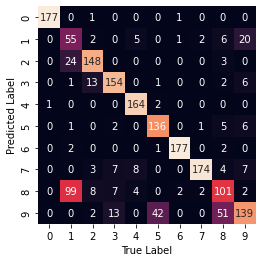

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true, labels)
sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(n_clusters), yticklabels=range(n_clusters))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')